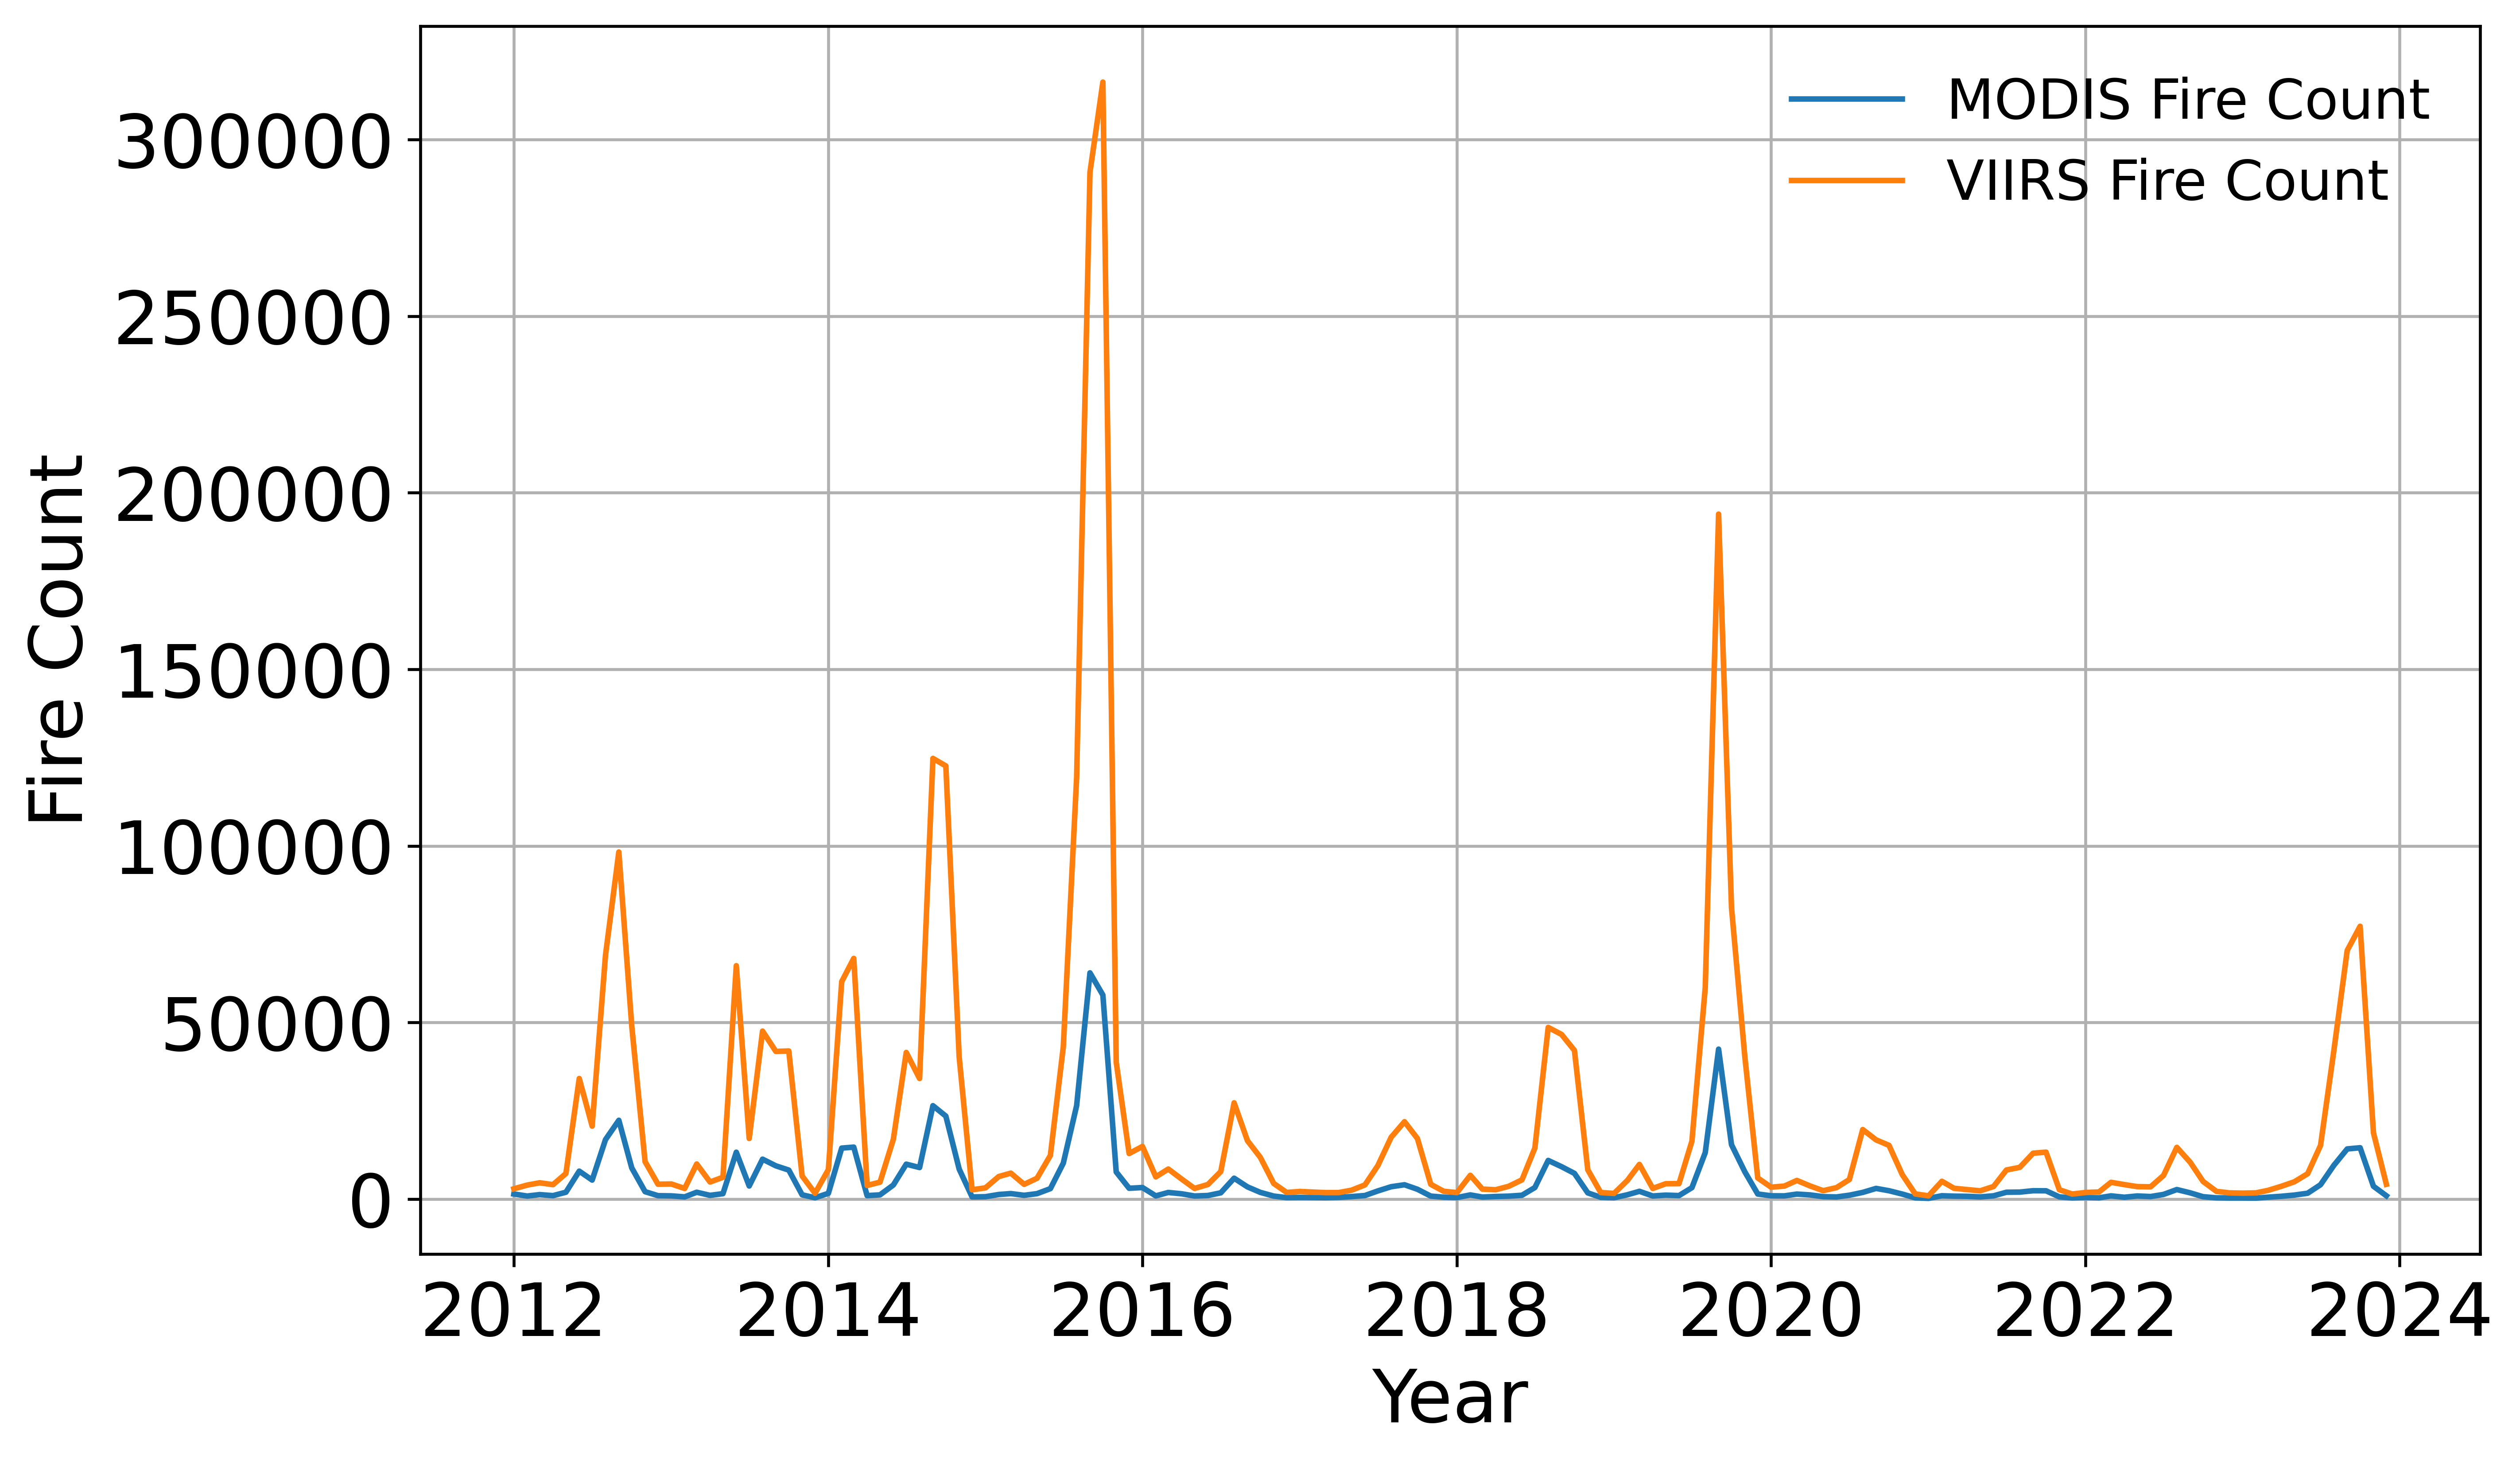

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 加载数据
file_path = 'data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=1)

# 重命名列以便理解
df.columns = ['Month', 'MODIS Fire Count', 'MODIS Total FRP', 'VIIRS Fire Count', 'VIIRS Total FRP', 'ENSO index', 'IOD index']

# 将'Month'列转换为日期格式
df['Month'] = pd.to_datetime(df['Month'], format='%m-%Y')

# F1a. 月度MODIS与VIIRS火灾数量折线图
plt.figure(figsize=(10, 6),dpi=600)
plt.plot(df['Month'], df['MODIS Fire Count'], label='MODIS Fire Count')
plt.plot(df['Month'], df['VIIRS Fire Count'], label='VIIRS Fire Count')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Fire Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('Monthly MODIS and VIIRS Fire Count')
plt.legend(fontsize=15,framealpha=0.0)
plt.grid(True)
# 保存图表
plt.savefig('F1a',dpi=600, bbox_inches='tight')
plt.show()



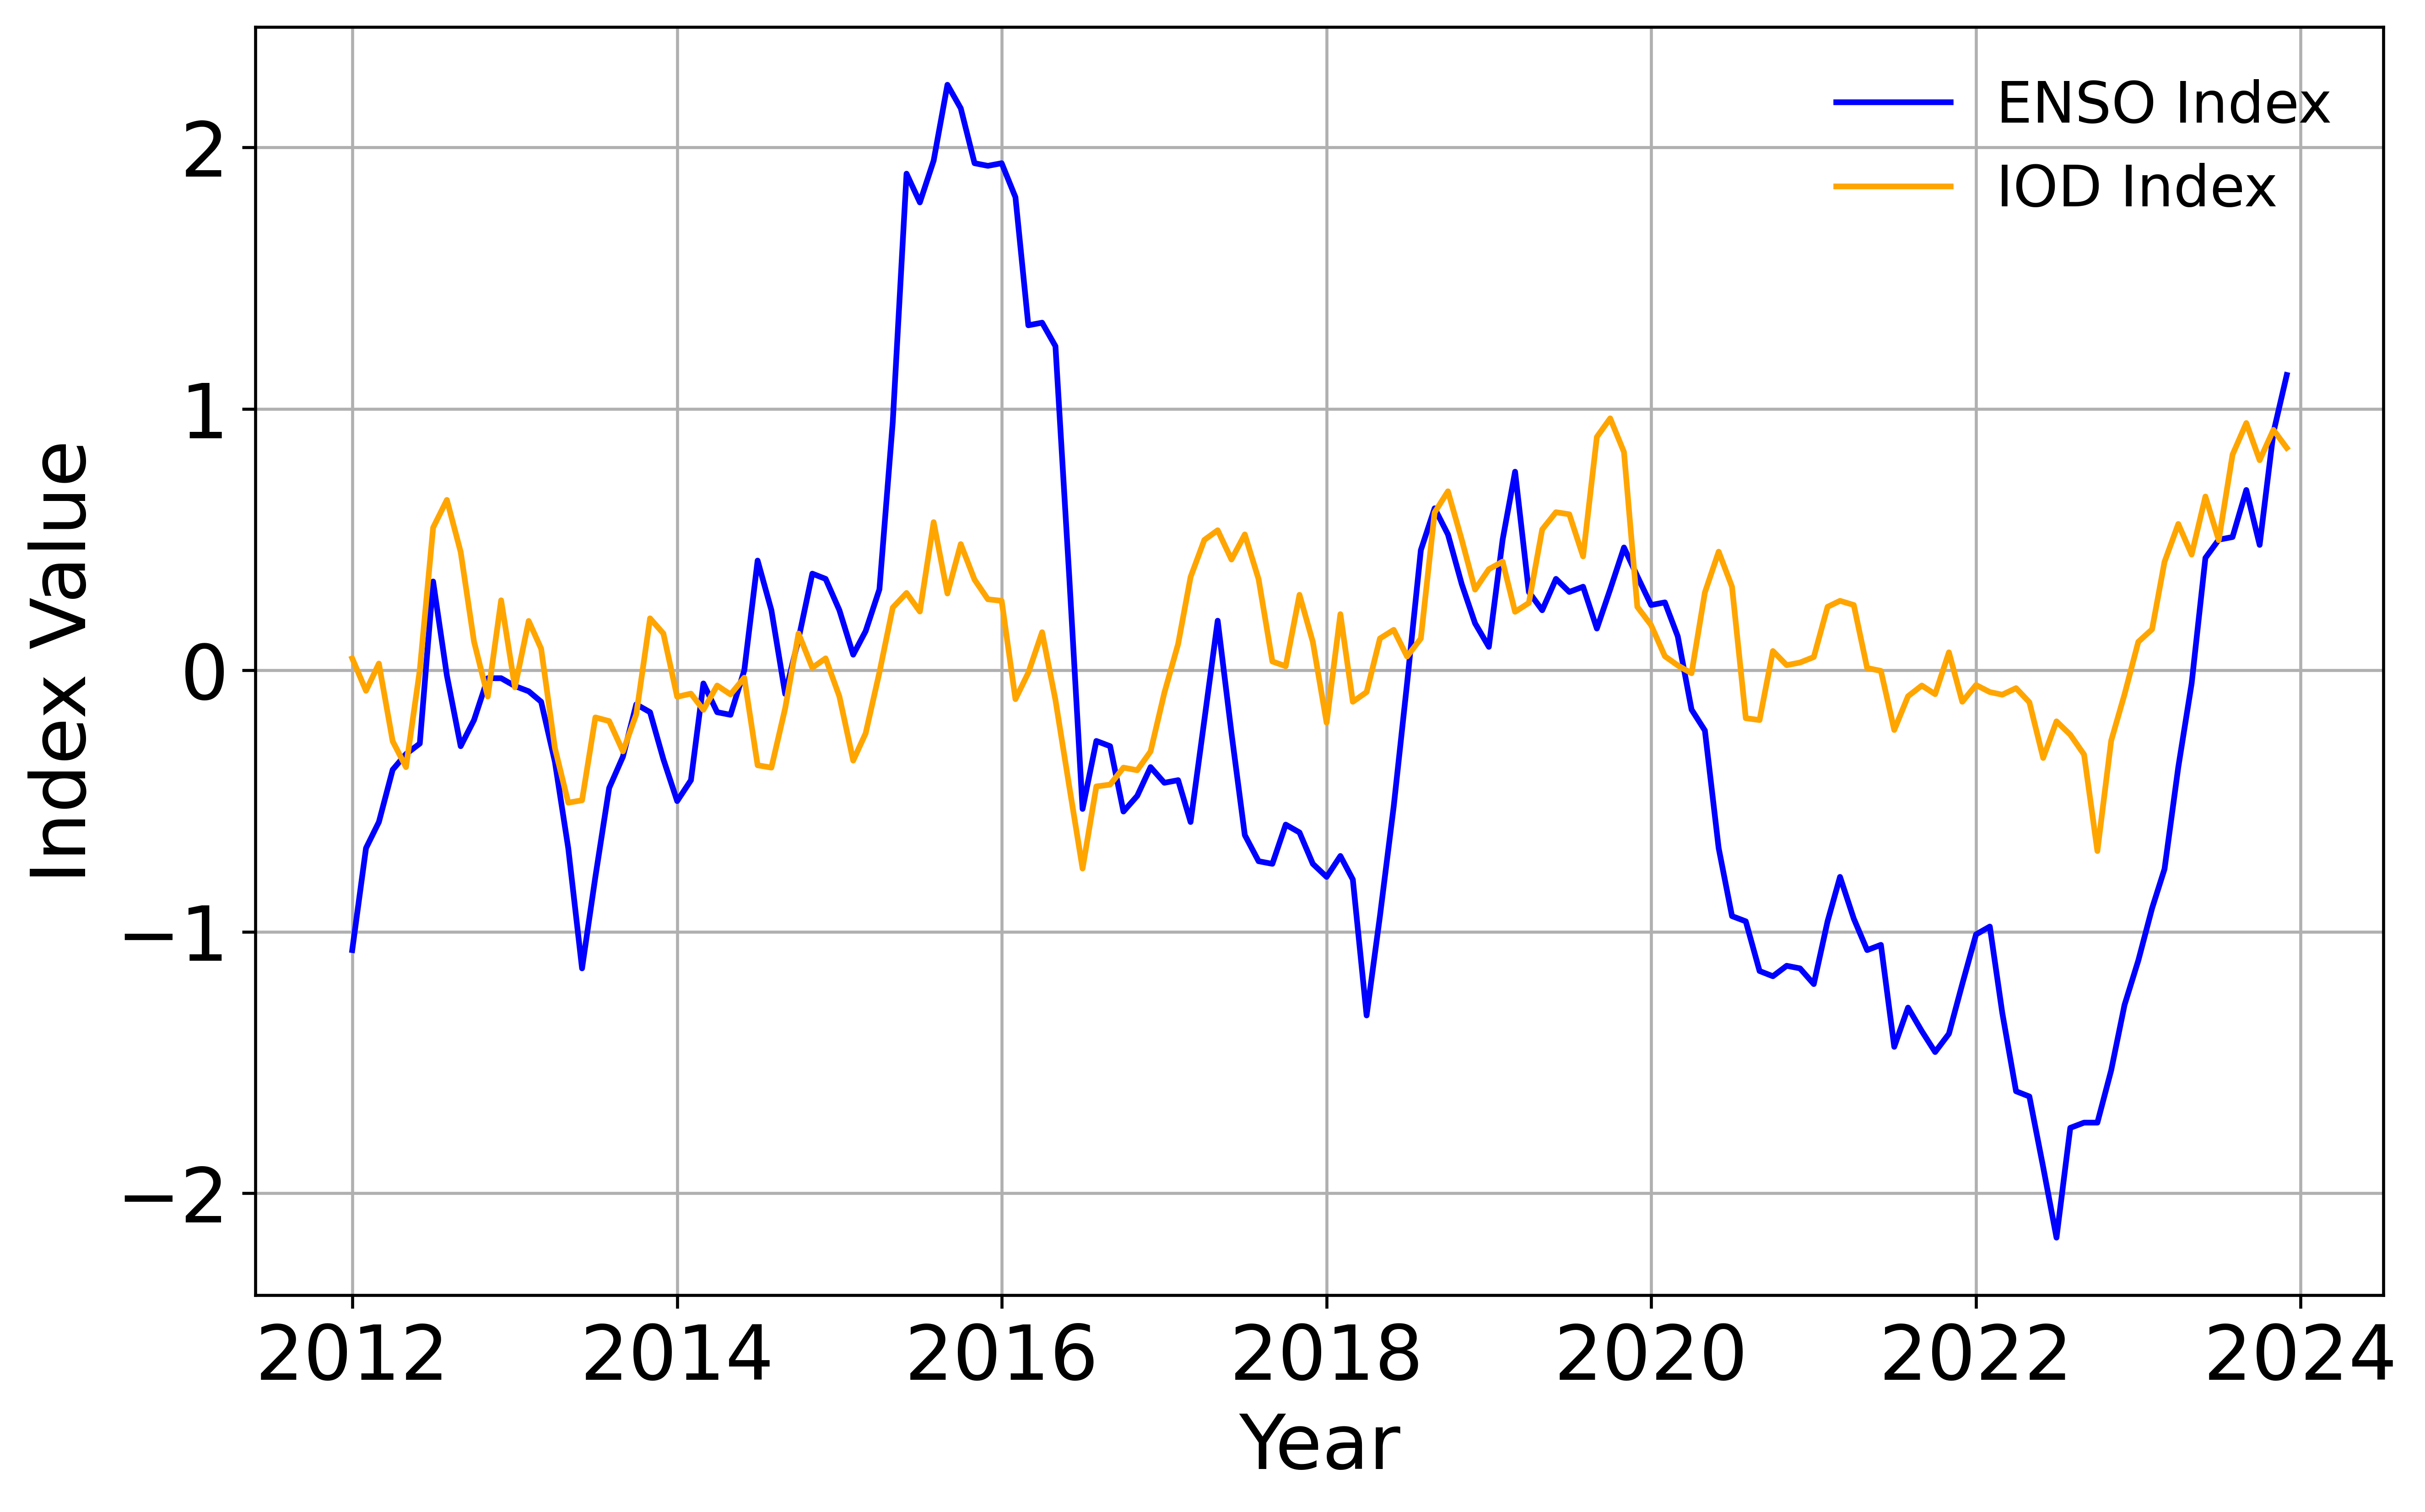

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 加载数据
file_path = 'data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=1)

# 重命名列以便理解
df.columns = ['Month', 'MODIS Fire Count', 'MODIS Total FRP', 'VIIRS Fire Count', 'VIIRS Total FRP', 'ENSO index', 'IOD index']

# 将'Month'列转换为日期格式
df['Month'] = pd.to_datetime(df['Month'], format='%m-%Y')

# F1b. 月度ENSO与IOD指数变化折线图
plt.figure(figsize=(10, 6),dpi=600)
plt.plot(df['Month'], df['ENSO index'], label='ENSO Index', color='blue')
plt.plot(df['Month'], df['IOD index'], label='IOD Index', color='orange')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Index Value',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('Monthly ENSO and IOD Indices')
plt.legend(fontsize=15,framealpha=0.0)
plt.grid(True)
plt.savefig('F1b',dpi=600, bbox_inches='tight')
plt.show()

r: 0.7727
P: 0.0032


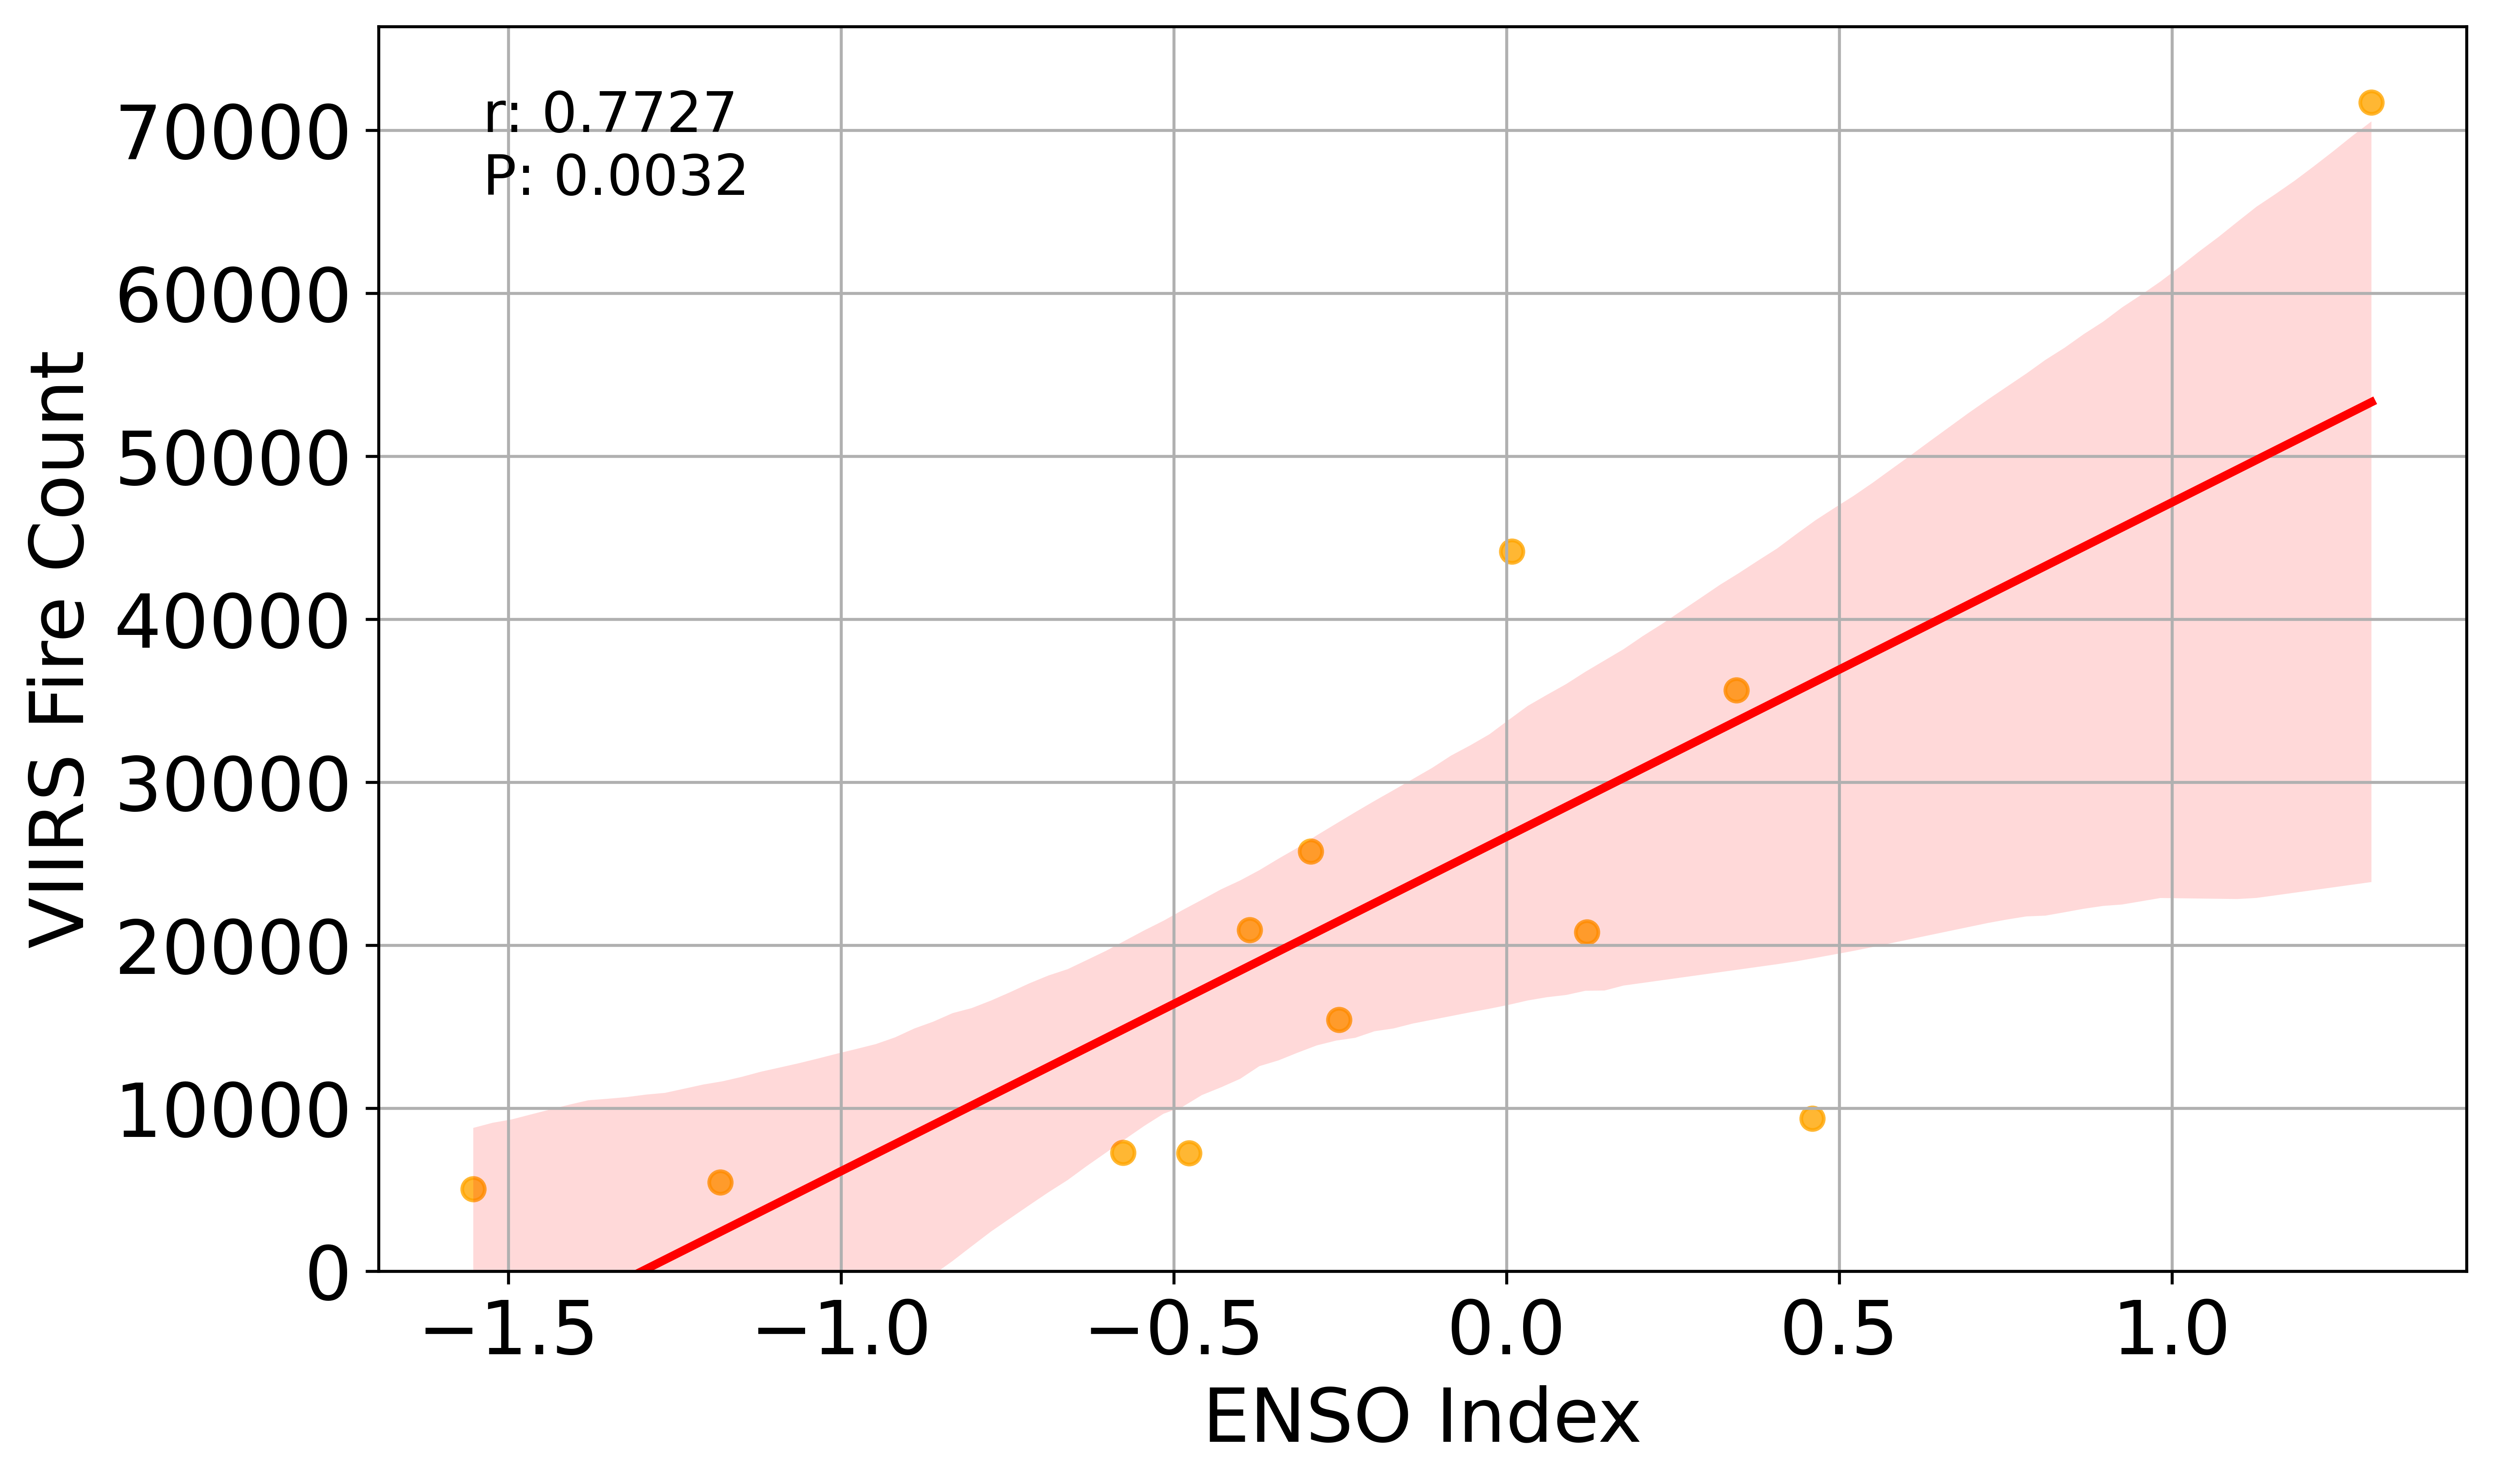

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 加载数据
file_path = 'data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=1)

# 重命名列以便理解
df.columns = ['Month', 'MODIS Fire Count', 'MODIS Total FRP', 'VIIRS Fire Count', 'VIIRS Total FRP', 'ENSO index', 'IOD index']

# 将'Month'列转换为日期格式
df['Month'] = pd.to_datetime(df['Month'], format='%m-%Y')

# 将日期转换为年份
df['Year'] = df['Month'].dt.year

# 按年份聚合数据，计算每年的平均火灾计数和ENSO指数
df_yearly = df.groupby('Year').agg({
    'VIIRS Fire Count': 'mean',
    'ENSO index': 'mean'
}).reset_index()

# 计算皮尔逊相关系数  
enso_index = df_yearly['ENSO index']  
fire_count = df_yearly['VIIRS Fire Count']  
corr, p_value = stats.pearsonr(enso_index, fire_count)  
  
print(f'r: {corr:.4f}')  
print(f'P: {p_value:.4f}')  
  
# 绘制散点图并显示回归线  
plt.figure(figsize=(10, 6), dpi=600)  
sns.regplot(x='ENSO index', y='VIIRS Fire Count', data=df_yearly, scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})  
plt.xlabel('ENSO Index', fontsize=20)  
plt.ylabel('VIIRS Fire Count', fontsize=20)  
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  

# 设置y轴范围，从0开始
plt.ylim(bottom=0)  

# 在图的左上角添加皮尔逊相关系数和p值
plt.text(
    0.05, 0.95, 
    f'r: {corr:.4f}\nP: {p_value:.4f}', 
    transform=plt.gca().transAxes,
    fontsize=15,
    verticalalignment='top',
    bbox=dict(facecolor='none', alpha=0.5, edgecolor='none')
)

plt.grid(True)  
plt.savefig('F1c', dpi=600, bbox_inches='tight')  
plt.show()

PCC: 0.7639
P: 0.0038


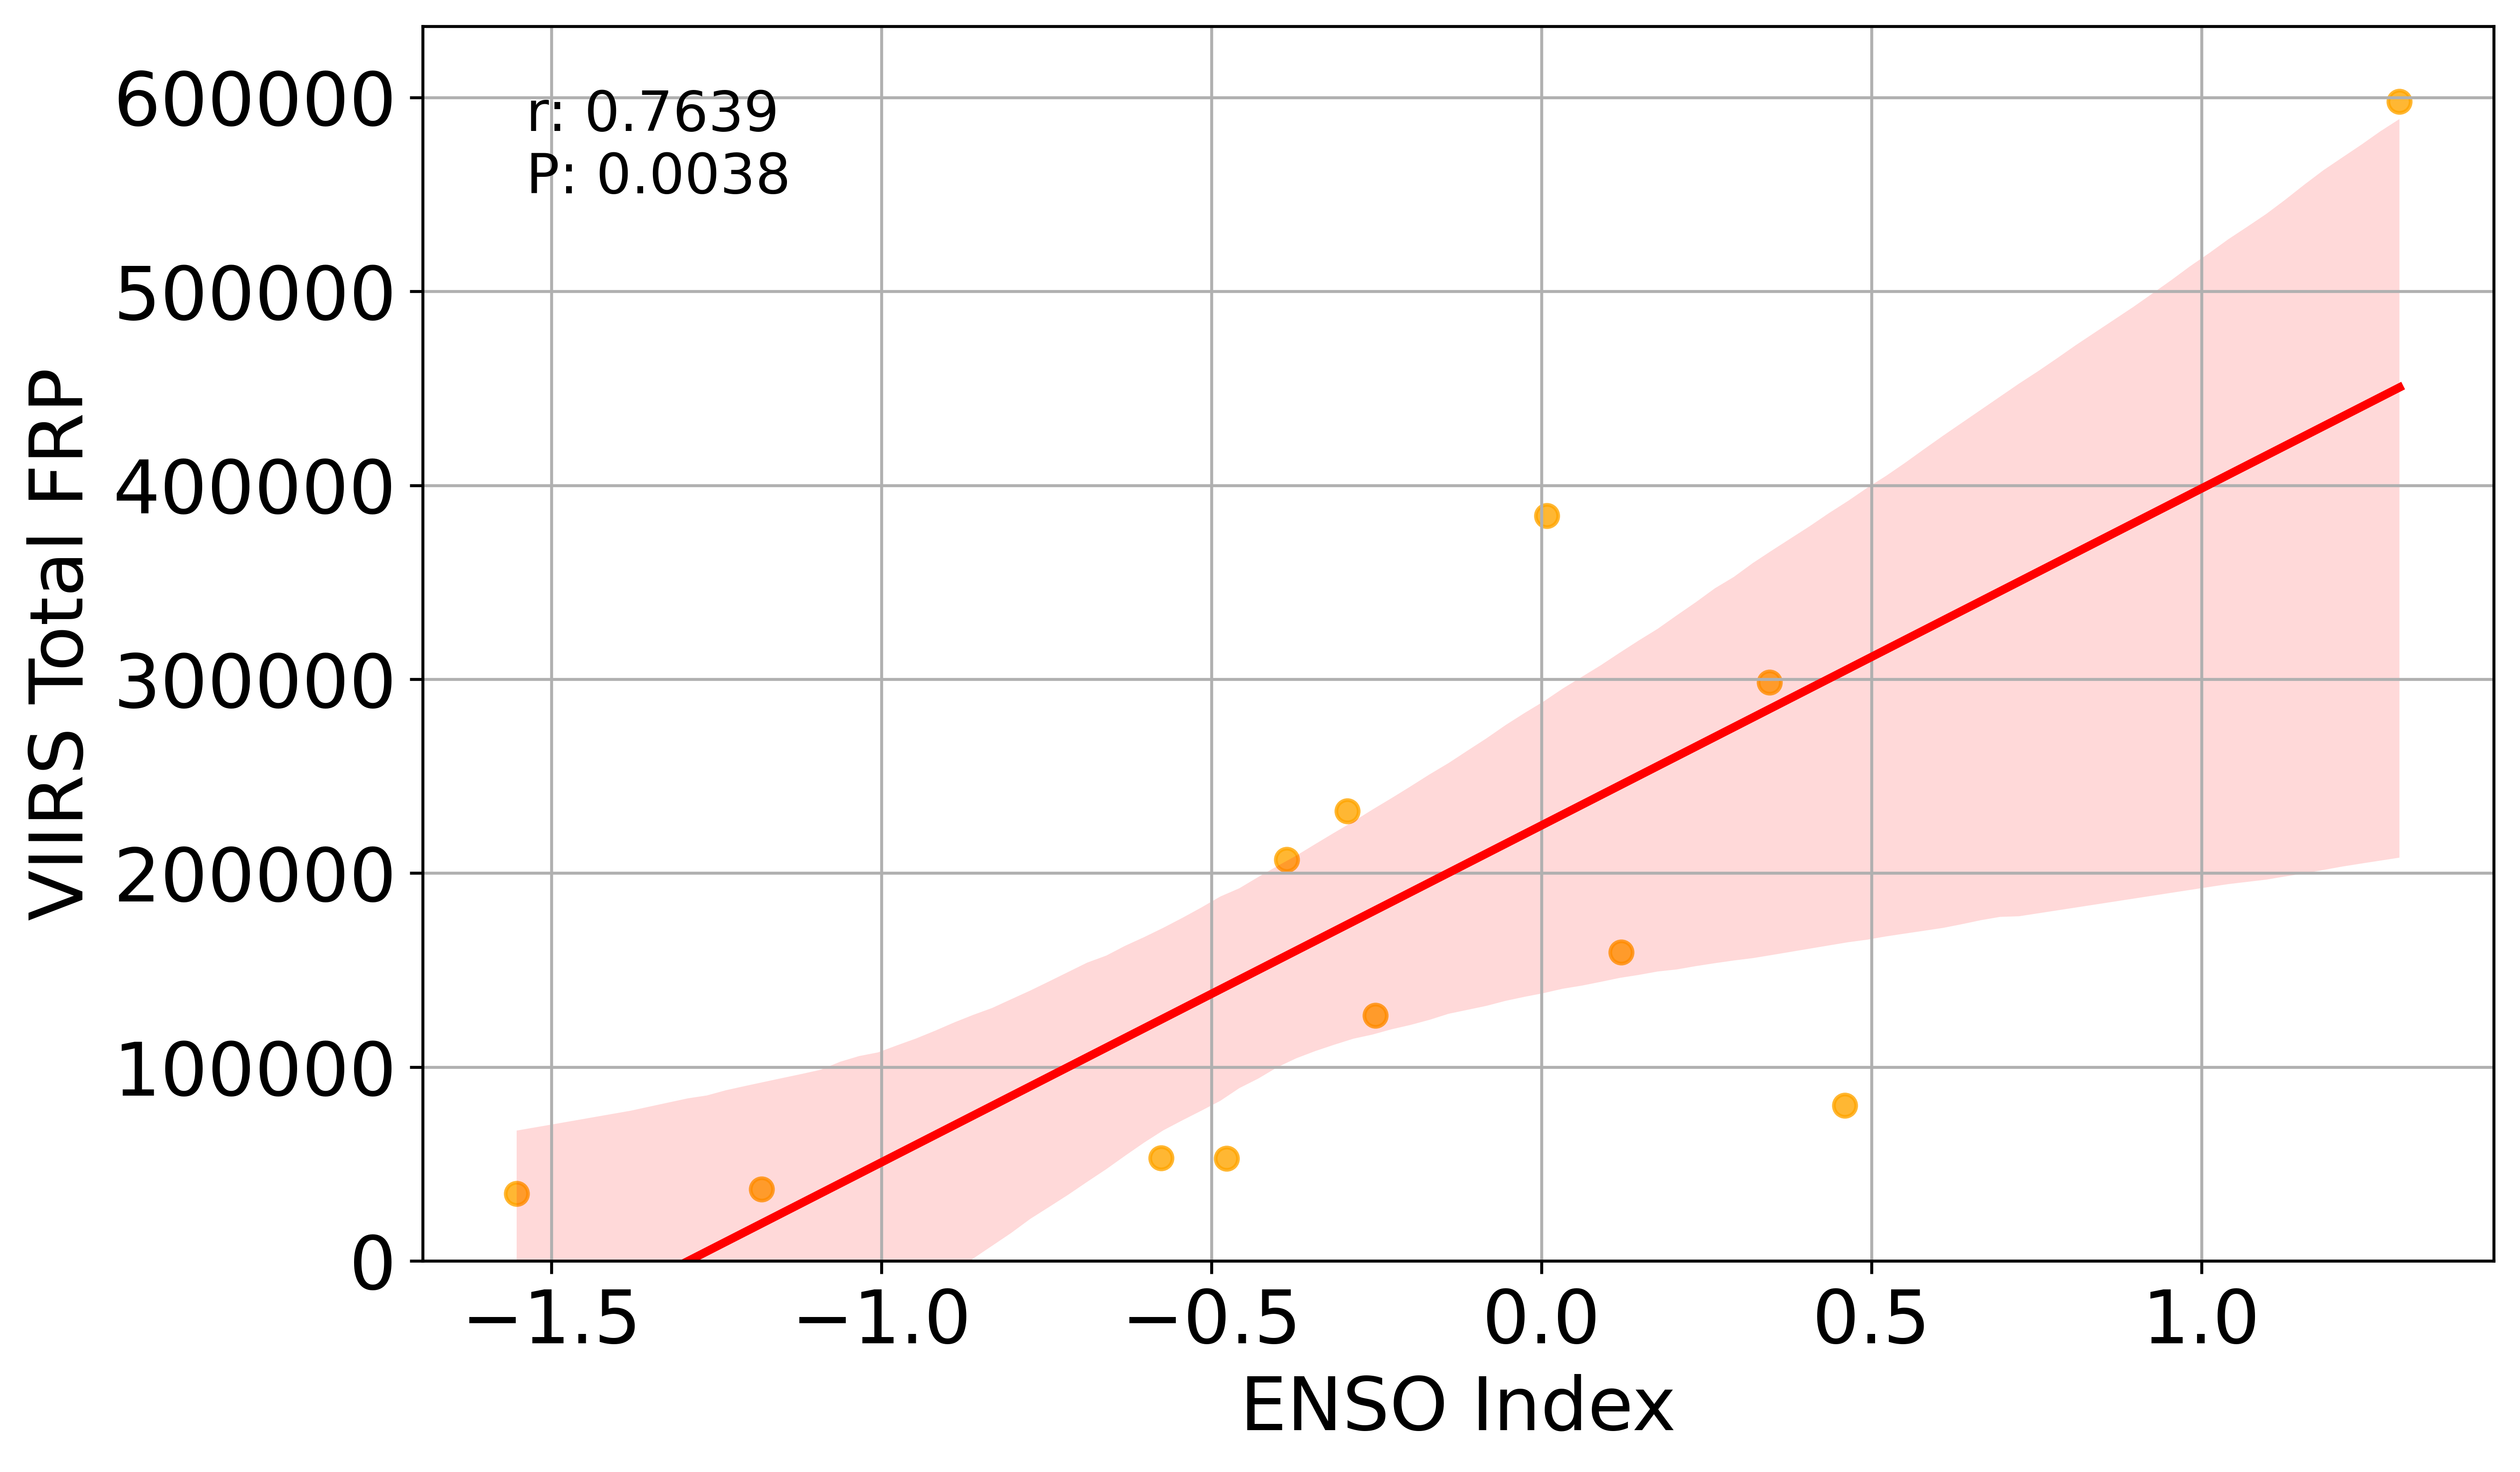

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 加载数据
file_path = 'data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=1)

# 重命名列以便理解
df.columns = ['Month', 'MODIS Fire Count', 'MODIS Total FRP', 'VIIRS Fire Count', 'VIIRS Total FRP', 'ENSO index', 'IOD index']

# 将'Month'列转换为日期格式
df['Month'] = pd.to_datetime(df['Month'], format='%m-%Y')

# 将日期转换为年份
df['Year'] = df['Month'].dt.year

# 按年份聚合数据，计算每年的平均火灾计数和ENSO指数
df_yearly = df.groupby('Year').agg({
    'VIIRS Total FRP': 'mean',
    'ENSO index': 'mean'
}).reset_index()
# 计算皮尔逊相关系数  
enso_index = df_yearly['ENSO index']  
fire_count = df_yearly['VIIRS Total FRP']  
corr, p_value = stats.pearsonr(enso_index, fire_count)  
  
print(f'PCC: {corr:.4f}')  
print(f'P: {p_value:.4f}')  
plt.figure(figsize=(10, 6),dpi=600)
sns.regplot(x='ENSO index', y='VIIRS Total FRP', data=df_yearly, scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
plt.xlabel('ENSO Index',fontsize=20)
plt.ylabel('VIIRS Total FRP',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置y轴范围，从0开始
plt.ylim(bottom=0)  
# 在图的左上角添加皮尔逊相关系数和p值
plt.text(
    0.05, 0.95, 
    f'r: {corr:.4f}\nP: {p_value:.4f}', 
    transform=plt.gca().transAxes,
    fontsize=15,
    verticalalignment='top',
    bbox=dict(facecolor='none', alpha=0.5, edgecolor='none')
)
plt.grid(True)
plt.savefig('F1d',dpi=600, bbox_inches='tight')
plt.show()
